<a href="https://colab.research.google.com/github/ShayEK34/DPL-Assignment2/blob/main/Ass_2_Q3_Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assinmgent 2, Question 3 - Corporación Favorita Grocery Sales Forecasting - Data exploration**

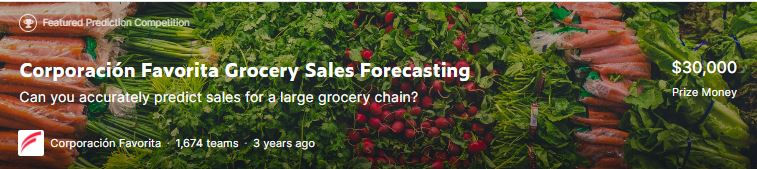



```
# This is formatted as code
```

Install py7zr lib to open the zip files

In [1]:
!pip install py7zr

Download the data zip files from Kaggle

In [2]:
!kaggle competitions download -c favorita-grocery-sales-forecasting

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Import all the libreries

In [5]:
import os
import py7zr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import gc;gc.collect
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

for f in['holidays_events.csv.7z', 'test.csv.7z', 'oil.csv.7z', 'items.csv.7z', 'transactions.csv.7z', 'sample_submission.csv.7z', 'train.csv.7z', 'stores.csv.7z']:
    zf = py7zr.SevenZipFile(os.path.join('..', 'content', f), mode='r')
    zf.extractall('../content/datasets')


Reduce memory function to reduce size of Dataframe

In [6]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of Dataframe is {:.3f} MB'.format(start_mem))

    for col in tqdm(df.columns):
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)

            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        # elif 'datetime' not in col_type.name:
        #     df[col] = df[col].astype('datetime64[ns]')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

Read the train file (only years 2016-2017)

In [7]:
path_1 = "/content/datasets/"


df_test = pd.read_csv(path_1 + 'test.csv',)
df_test = reduce_mem_usage(df_test)
print('Done Test reduce')
dtypes_dict = dict(df_test.dtypes)

df_train = pd.read_csv(path_1 + 'train.csv',dtype=dtypes_dict)
df_train = reduce_mem_usage(df_train)
df_train['date'] = pd.to_datetime(df_train.date)
print('Done Train reduce')

del df_test; gc.collect() 


100%|██████████| 5/5 [00:00<00:00, 47.64it/s]

Memory usage of Dataframe is 106.073 MB
Memory usage after optimization is: 61.072 MB
Decreased by 42.4%
Done Test reduce



  0%|          | 0/6 [00:00<?, ?it/s]

Memory usage of Dataframe is 3231.449 MB


100%|██████████| 6/6 [00:05<00:00,  1.16it/s]


Memory usage after optimization is: 2752.716 MB
Decreased by 14.8%
Done Train reduce


0

Group by store_nbr and sum of unit sales for each store_nbr

Bar chart how many unit sales sold in every store

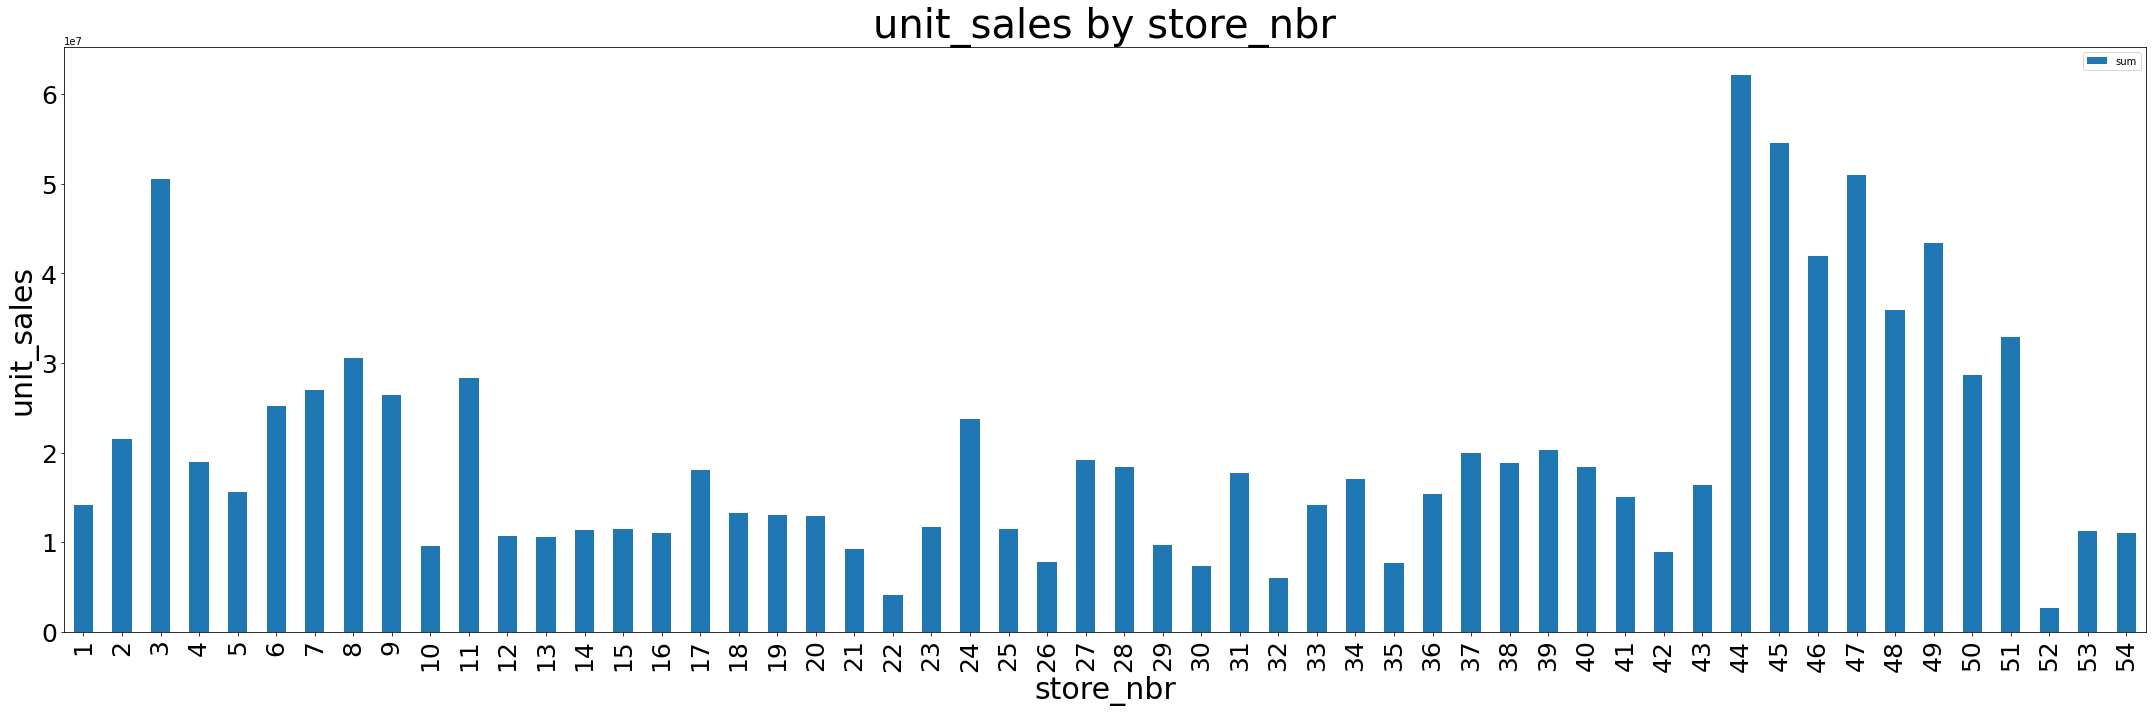

0

In [4]:
x = df_train.groupby([ 'store_nbr'],as_index=False).agg({'unit_sales': ['sum']})
#Plotting store_nbr Vs unit_sales

fig, ax = plt.subplots(figsize=(30,10))
ax = x.plot(kind='bar',x='store_nbr',y='unit_sales', ax=ax)
plt.title('unit_sales by store_nbr', size = 40)
plt.xlabel("store_nbr", size=30)
plt.ylabel("unit_sales", size=30)
plt.xticks(size = 25)
plt.yticks(size = 25)
fig.tight_layout()
plt.show()

del x; gc.collect()
del ax; gc.collect()

Bar chart how many unit sales sold every year

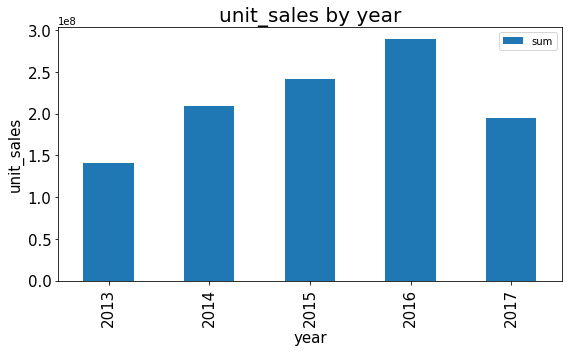

0

In [5]:
df_train['year'] = df_train["date"].dt.year

x = df_train.groupby(['year'],as_index=False).agg({'unit_sales': ['sum']})

#Plotting store_nbr Vs unit_sales

fig, ax = plt.subplots(figsize=(8,5))
ax = x.plot(kind='bar',x='year',y='unit_sales', ax=ax)
plt.title('unit_sales by year', size = 20)
plt.xlabel("year", size=15)
plt.ylabel("unit_sales", size=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
fig.tight_layout()
plt.show()

del x; gc.collect()
del ax; gc.collect()

Bar chart - how many unit sales sold every month each year


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


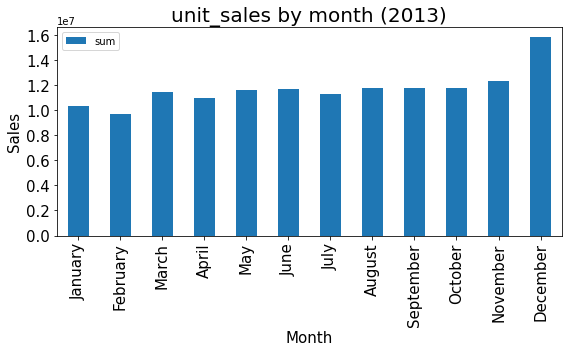

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


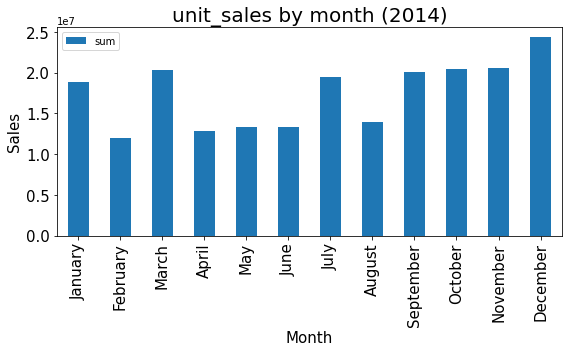

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


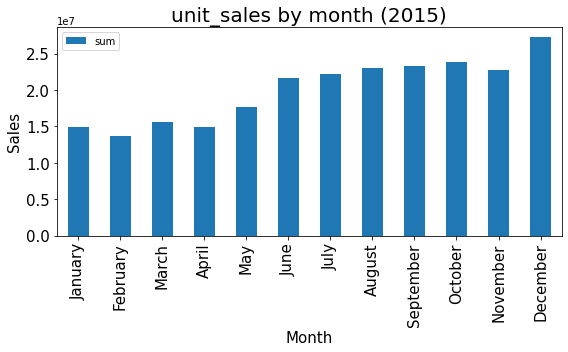

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_train['month_seq'] = df_train["date"].dt.month

for year in df_train['date'].dt.year.unique():
    # Filtering data for specific year
    # x = df_train[df_train['date'].dt.year == year]
    y = df_train['date'].dt.year
    x = df_train[y == year]

    # Extracting month name for date
    x['month_name'] = x['date'].dt.month_name()

    # Frouping data by months and adding unit sales
    x = x.groupby(['month_name','month_seq'], as_index=False).agg({'unit_sales': ['sum']})

    # #Sorting dataframe by month
    x = x.sort_values(by="month_seq")

    fig, ax = plt.subplots(figsize=(8, 5))
    ax = x.plot(kind='bar', x='month_name', y='unit_sales', ax=ax)
    plt.title("unit_sales by month (" + str(year) + ")", size=20)
    plt.xlabel("Month", size=15)
    plt.ylabel("Sales", size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    fig.tight_layout()
    plt.show()

In [8]:
df_train['day_num'] = df_train["date"].dt.day
data_2016 = df_train[df_train['date'].dt.year == 2016]
data_2016 = reduce_mem_usage(data_2016)

  0%|          | 0/7 [00:00<?, ?it/s]

Memory usage of Dataframe is 1310.315 MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 14%|█▍        | 1/7 [00:00<00:01,  4.26it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Memory usage after optimization is: 1075.130 MB
Decreased by 17.9%


Let's use just data of year 2016

Bar chart - how many unit sales sold every day each month in 2016

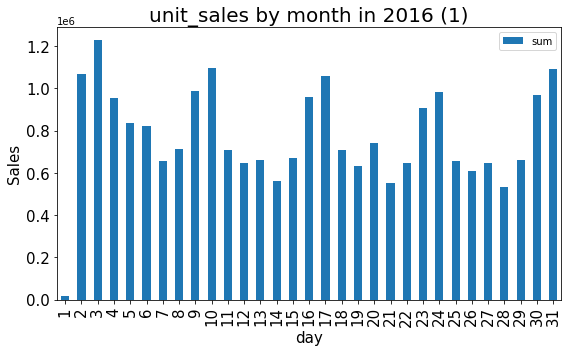

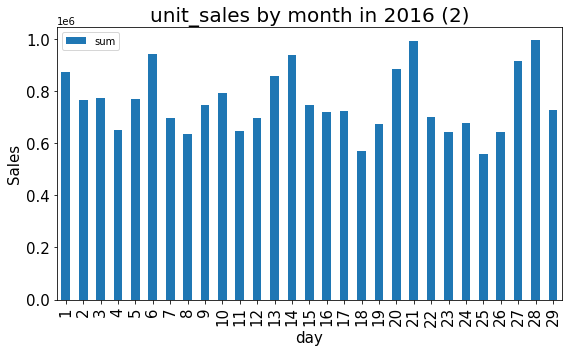

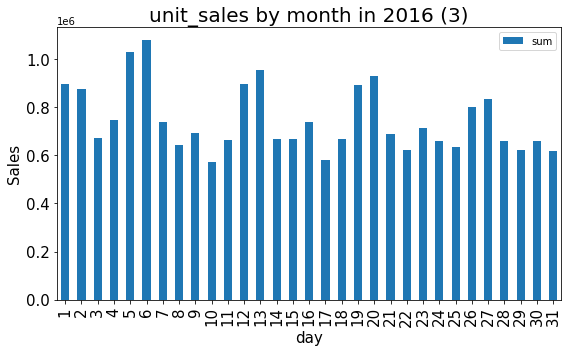

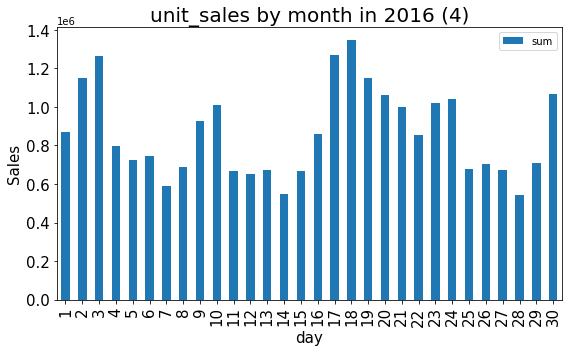

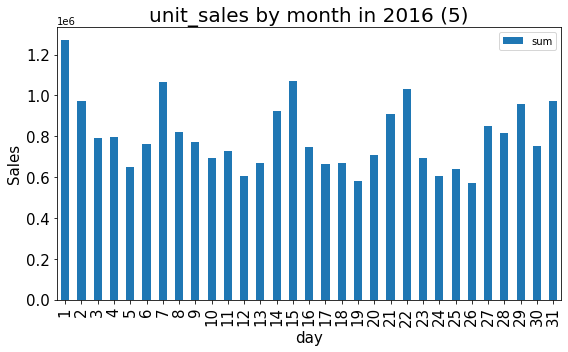

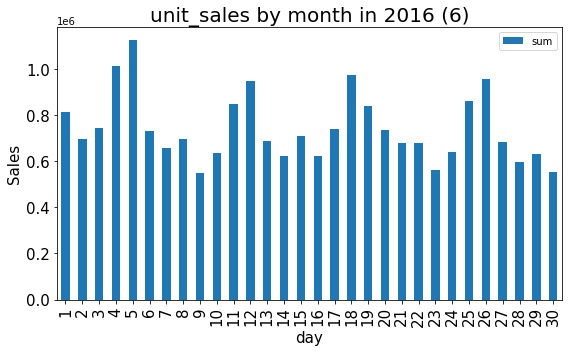

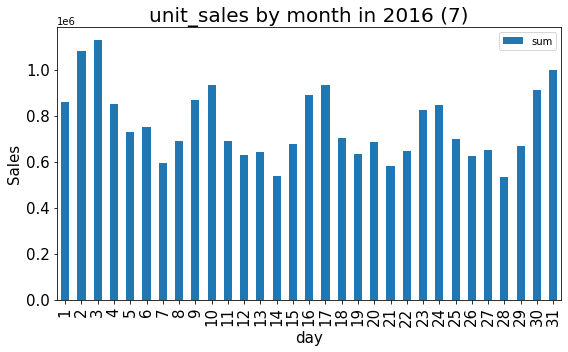

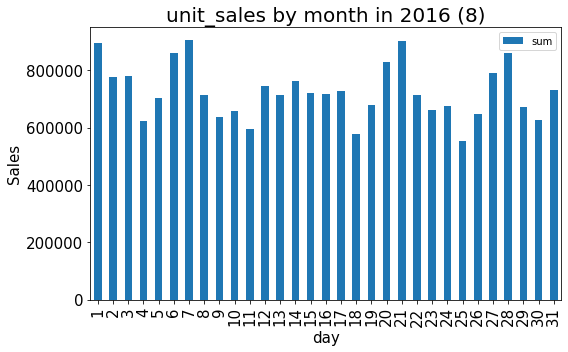

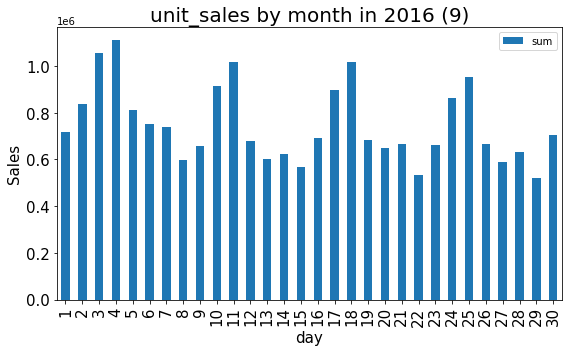

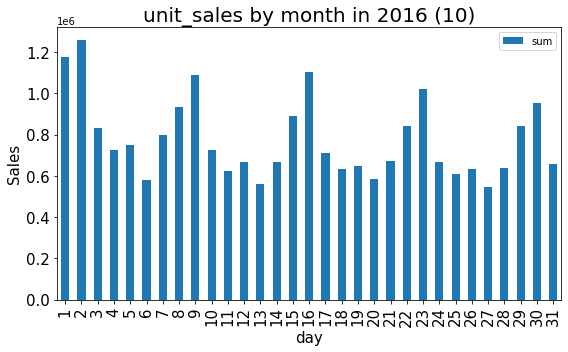

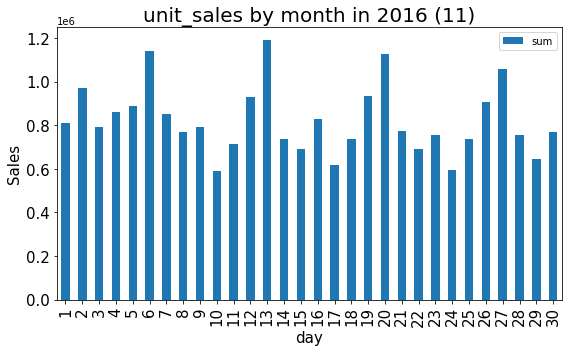

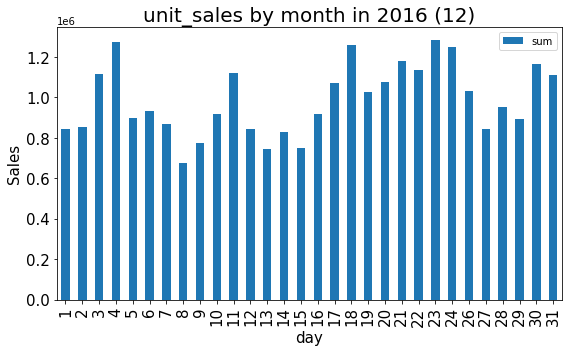

In [11]:

# del df_train

for month in data_2016['date'].dt.month.unique():
    # Filtering data for specific year
    x = data_2016[data_2016['date'].dt.month == month]

    # Frouping data by months and adding unit sales
    x = x.groupby(['day_num'], as_index=False).agg({'unit_sales': ['sum']})

    # #Sorting dataframe by month
    x = x.sort_values(by="day_num")

    fig, ax = plt.subplots(figsize=(8, 5))
    ax = x.plot(kind='bar', x='day_num', y='unit_sales', ax=ax)
    plt.title("unit_sales by month in 2016 (" + str(month) + ")", size=20)
    plt.xlabel("day", size=15)
    plt.ylabel("Sales", size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    fig.tight_layout()
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


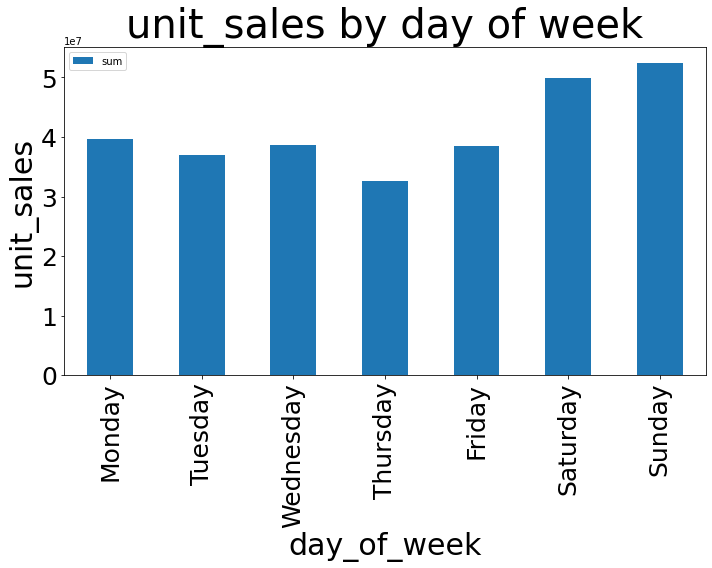

In [5]:
data_2016['day_of_week'] = data_2016['date'].dt.day_name()
data_2016['day_of_week_num'] = data_2016['date'].dt.weekday

x = data_2016.groupby(['day_of_week','day_of_week_num'],as_index=False).agg({'unit_sales': ['sum']})

#Plotting store_nbr Vs unit_sales
x = x.sort_values(by="day_of_week_num")

fig, ax = plt.subplots(figsize=(10, 8))
ax = x.plot(kind='bar',x='day_of_week',y='unit_sales', ax=ax)
plt.title('unit_sales by day of week', size = 40)
plt.xlabel("day_of_week", size=30)
plt.ylabel("unit_sales", size=30)
plt.xticks(size = 25)
plt.yticks(size = 25)
fig.tight_layout()
plt.show()

In [12]:
del x; gc.collect()
del ax; gc.collect()

0

100%|██████████| 2/2 [00:00<00:00, 1715.81it/s]

Memory usage of Dataframe is 0.019 MB
Memory usage after optimization is: 0.012 MB
Decreased by 37.3%


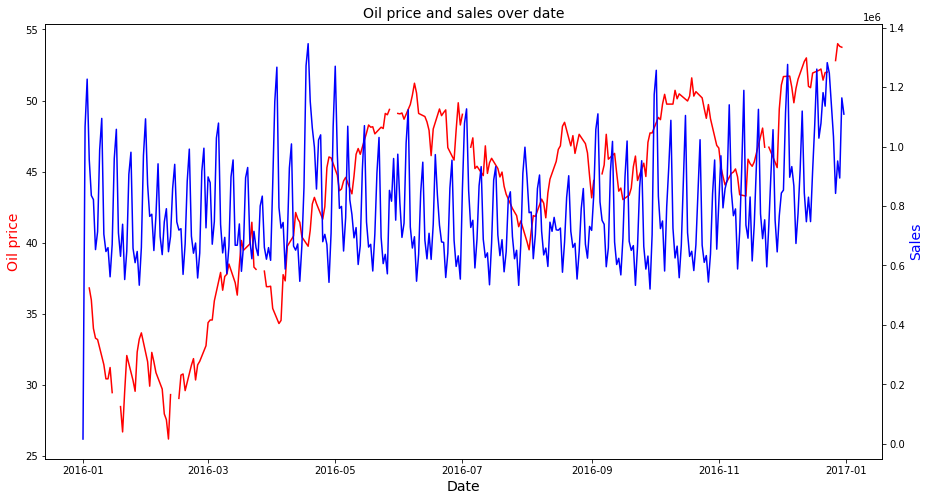

In [6]:
x = data_2016.groupby(['date'],as_index=False).agg({'unit_sales': ['sum']})

df_oil = pd.read_csv(path_1 + 'oil.csv')
df_oil = reduce_mem_usage(df_oil)
df_oil['date'] = pd.to_datetime(df_oil.date)
df_oil_2016 = df_oil[df_oil["date"].dt.year==2016]


fig,ax = plt.subplots()
fig.set_size_inches(15,8)
ax.plot(df_oil_2016.date,df_oil_2016.dcoilwtico,color = 'red')

ax.set_xlabel("Date", fontsize =14)
ax.set_ylabel("Oil price",color = "red", fontsize = 14)
ax.figsize = (50,11)

ax2 = ax.twinx()
ax2.plot(x.date,x.unit_sales,color= 'blue')
ax2.set_ylabel("Sales",color= 'blue',fontsize=14)
plt.title("Oil price and sales over date", fontsize = 14)
plt.show()

In [9]:
df_stores = pd.read_csv(path_1 + 'stores.csv',)
store_sales = data_2016.merge(df_stores, how='inner', on= 'store_nbr')

store_sales_reduced = reduce_mem_usage(store_sales)

del store_sales; gc.collect()


  0%|          | 0/11 [00:00<?, ?it/s]

Memory usage of Dataframe is 2150.261 MB


100%|██████████| 11/11 [00:01<00:00,  6.41it/s]


Memory usage after optimization is: 1915.076 MB
Decreased by 10.9%


0

Bar chart - how many unit sales sold in each state



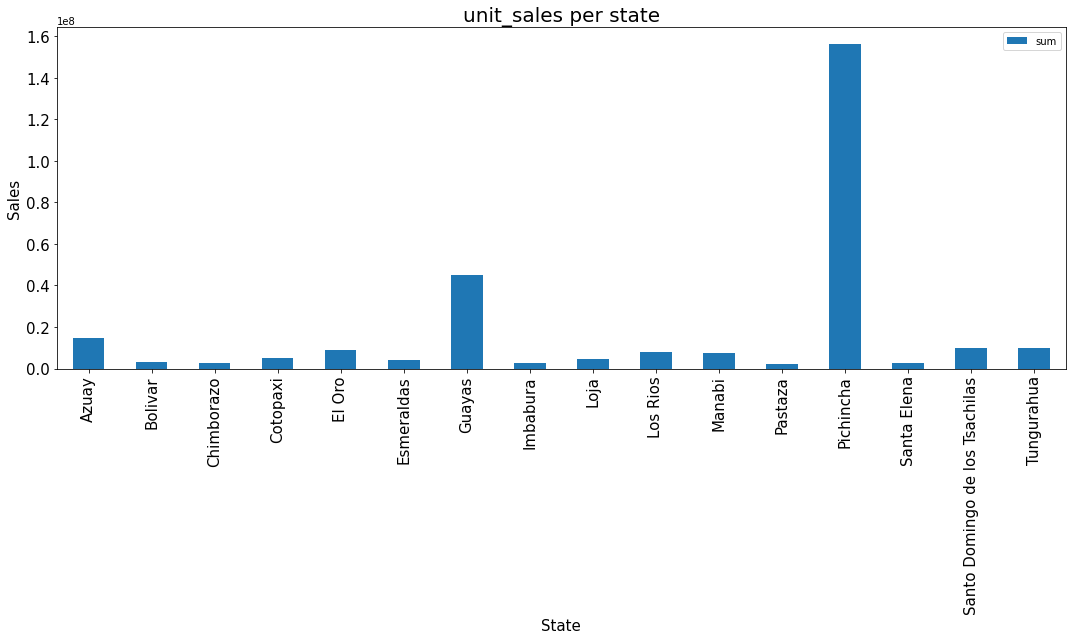

0

In [10]:
x = store_sales_reduced.groupby(['state'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(15, 9))
ax = x.plot(kind='bar', x='state', y='unit_sales', ax=ax)
plt.title("unit_sales per state", size=20)
plt.xlabel("State", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

del x; gc.collect()
del ax; gc.collect()

Bar chart - how many unit sales sold in each city 

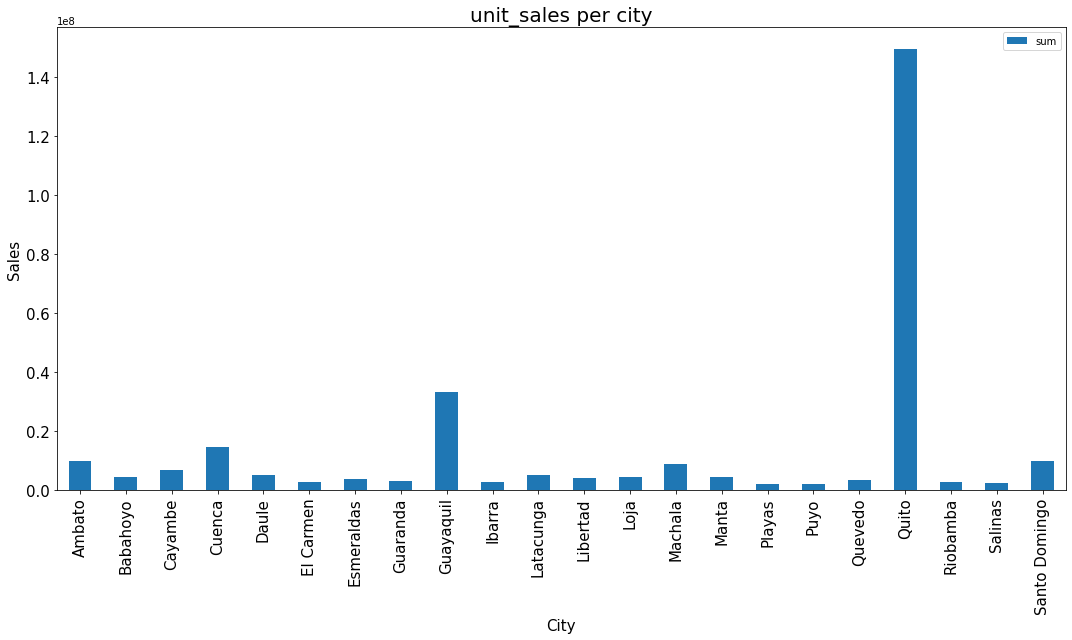

0

In [11]:
x = store_sales_reduced.groupby(['city'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(15, 9))
ax = x.plot(kind='bar', x='city', y='unit_sales', ax=ax)
plt.title("unit_sales per city", size=20)
plt.xlabel("City", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

del x; gc.collect()
del ax; gc.collect()

Bar chart - how many unit sales sold in each store type

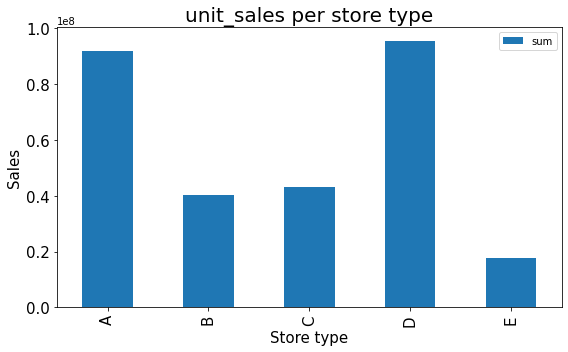

0

In [12]:
x = store_sales_reduced.groupby(['type'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(8, 5))
ax = x.plot(kind='bar', x='type', y='unit_sales', ax=ax)
plt.title("unit_sales per store type", size=20)
plt.xlabel("Store type", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

del x; gc.collect()
del ax; gc.collect()

Bar chart - how many unit sales sold in each cluster

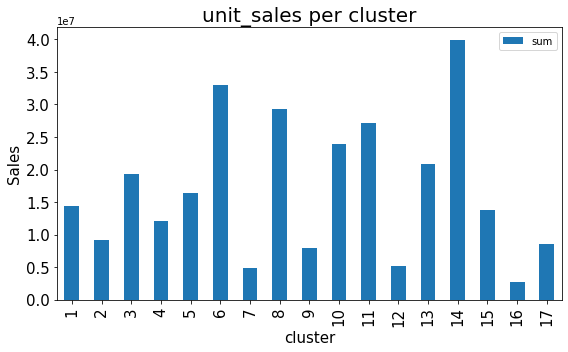

0

In [13]:
x = store_sales_reduced.groupby(['cluster'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(8, 5))
ax = x.plot(kind='bar', x='cluster', y='unit_sales', ax=ax)
plt.title("unit_sales per cluster", size=20)
plt.xlabel("cluster", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

del x; gc.collect()
del ax; gc.collect()

In [14]:
del store_sales_reduced; gc.collect()
df_items = pd.read_csv(path_1 + 'items.csv',)
item_sale = data_2016.merge(df_items, how='inner', on= 'item_nbr')

item_sales_reduced = reduce_mem_usage(item_sale)


 10%|█         | 1/10 [00:00<00:01,  5.40it/s]

Memory usage of Dataframe is 1881.478 MB


100%|██████████| 10/10 [00:01<00:00,  5.25it/s]

Memory usage after optimization is: 1444.706 MB
Decreased by 23.2%


Bar chart - how many unit sales sold per item family

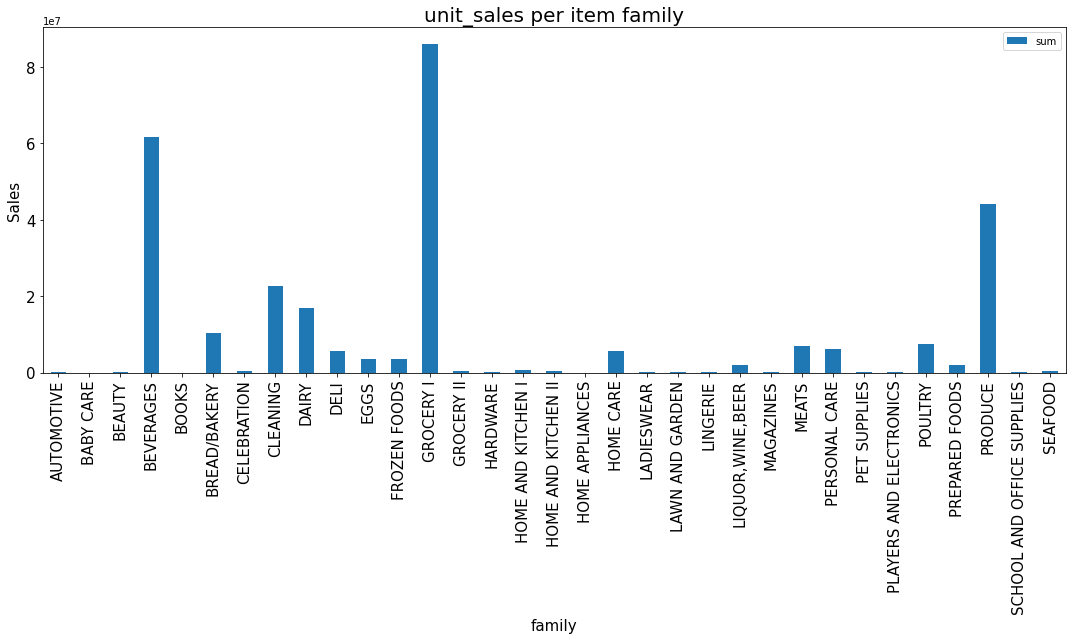

In [15]:
x = item_sales_reduced.groupby(['family'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(15, 9))
ax = x.plot(kind='bar', x='family', y='unit_sales', ax=ax)
plt.title("unit_sales per item family", size=20)
plt.xlabel("family", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

Bar chart - how many unit sales sold are perishable

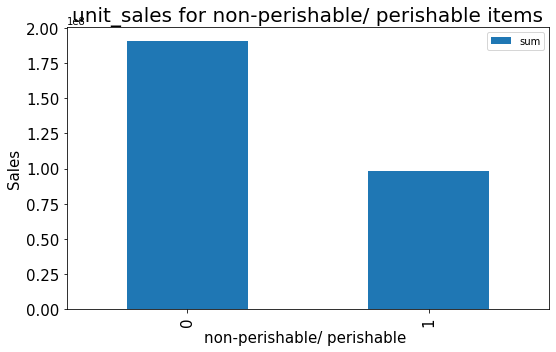

In [16]:
x = item_sales_reduced.groupby(['perishable'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(8, 5))
ax = x.plot(kind='bar', x='perishable', y='unit_sales', ax=ax)
plt.title("unit_sales for non-perishable/ perishable items", size=20)
plt.xlabel("non-perishable/ perishable ", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

In [17]:
# del item_sales_reduced; gc.collect()
df_holidays_events = pd.read_csv(path_1 + 'holidays_events.csv',parse_dates=['date'])
holiday_events_sales = data_2016.merge(df_holidays_events, how='inner', on= 'date')

holiday_events_sales_reduced = reduce_mem_usage(holiday_events_sales)

del holiday_events_sales; gc.collect()
del data_2016; gc.collect()




 33%|███▎      | 4/12 [00:00<00:00, 37.58it/s]

Memory usage of Dataframe is 512.125 MB


100%|██████████| 12/12 [00:00<00:00, 28.55it/s]

Memory usage after optimization is: 520.004 MB
Decreased by -1.5%


0

Bar chart - how many unit sales sold in local holiday

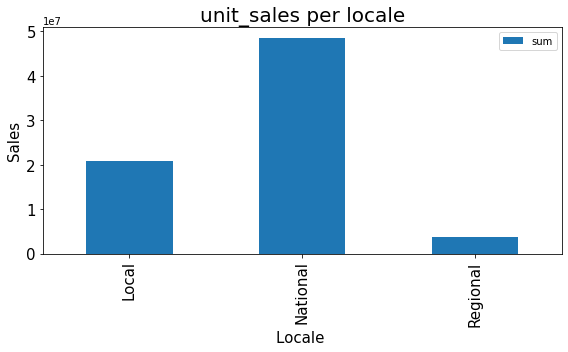

In [18]:
x = holiday_events_sales_reduced.groupby(['locale'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(8, 5))
ax = x.plot(kind='bar', x='locale', y='unit_sales', ax=ax)
plt.title("unit_sales per locale", size=20)
plt.xlabel("Locale ", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

Bar chart - how many unit sales sold in each holiday by local name

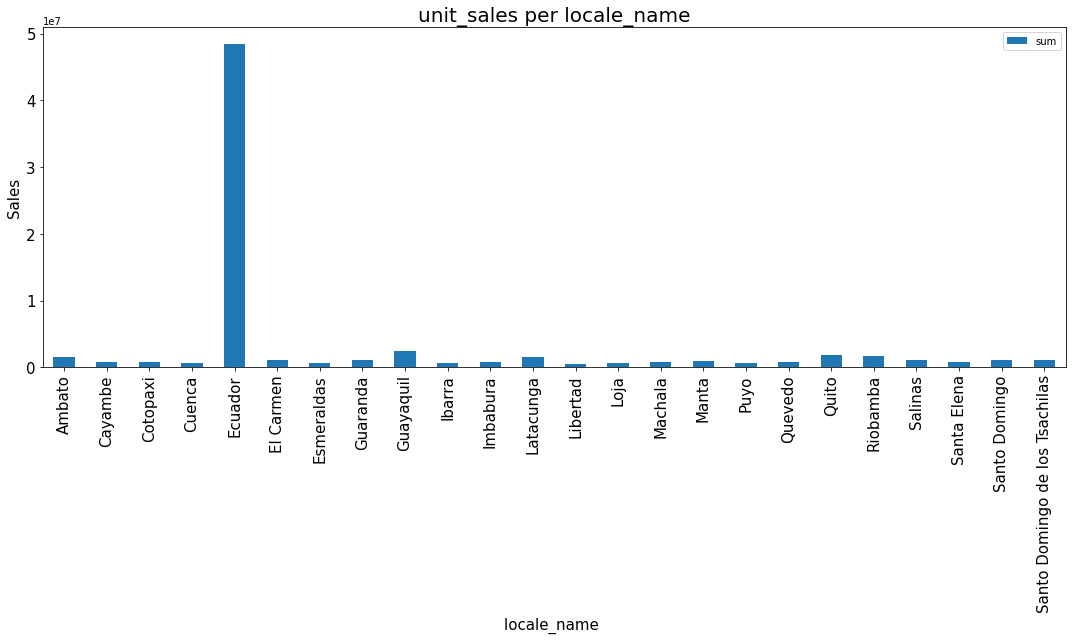

In [19]:
x = holiday_events_sales_reduced.groupby(['locale_name'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(15, 9))
ax = x.plot(kind='bar', x='locale_name', y='unit_sales', ax=ax)
plt.title("unit_sales per locale_name", size=20)
plt.xlabel("locale_name ", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

Bar chart - how many unit sales sold in each holiday by the holiday type

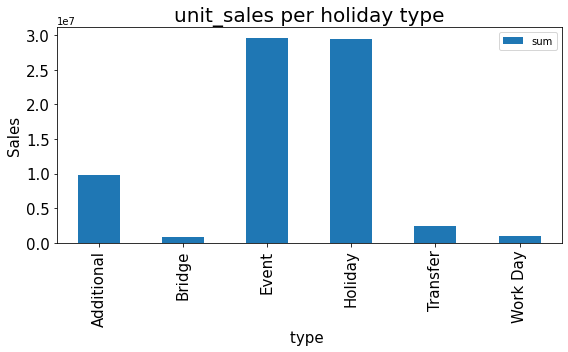

In [20]:
x = holiday_events_sales_reduced.groupby(['type'],as_index=False).agg({'unit_sales': ['sum']})

fig, ax = plt.subplots(figsize=(8, 5))
ax = x.plot(kind='bar', x='type', y='unit_sales', ax=ax)
plt.title("unit_sales per holiday type", size=20)
plt.xlabel("type ", size=15)
plt.ylabel("Sales", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
fig.tight_layout()
plt.show()

In [21]:
del holiday_events_sales_reduced; gc.collect()
del x; gc.collect()
del ax; gc.collect()

0